# Normal Empirical Distribution

Now, suppose I am not interested in each roll but in the average value of all the dice rolls of students in my classroom. I have 50 students present and each student rolls 1 die. I then take the mean of all 50 dice rolls. What is the probability distribution for the average dice roll? This is another question can be easily answered through simulation!

Simulations use a computer to mimic real experiments. Returning to our dice-rolling example from the [the previous section](../1/uniform.ipynb), instead of asking all of my students to roll dice and take the mean 100s or 1000s of times to plot an empirical distribution (which would be both noisy and time consuming), I can have the computer do it for us. First, we can write code that does this experiment one time. We use `sample` to roll our die and `np.mean` to take the average.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

die = pd.DataFrame(
    {
        'Face': np.arange(1, 7),
    }
)
np.mean(die.sample(50, replace=True))

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Face    3.54
dtype: float64

The next step is to write a function that can repeat the experiment a certain number of times. We can do this using a `for loop` and saving the results of each experiment in a `numpy` array.

In [2]:
def face_mean_sim(nsim):
    """Simulates nsim repetions of 50 dice rolls and returns their sample mean."""
    means = np.array([])
    for i in np.arange(nsim):
        means = np.append(means, np.mean(die.sample(50, replace=True)))
    return means

The code below plots the empirical distributions of results from 100, 1000, and 10000 replications of the dice rolling experiment.

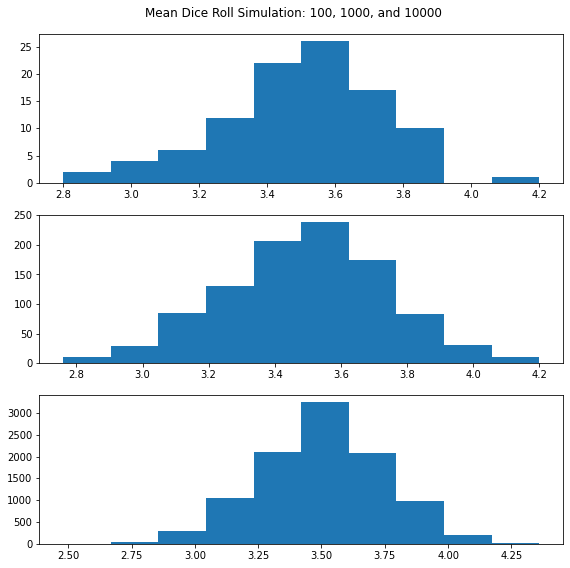

In [3]:
fig, axs = plt.subplots(3, figsize=(8, 8))
fig.suptitle('Mean Dice Roll Simulation: 100, 1000, and 10000')
fig.tight_layout()
axs[0].hist(face_mean_sim(100));
axs[1].hist(face_mean_sim(1_000));
axs[2].hist(face_mean_sim(10_000));

As we saw with our Uniform Distribution experiment, with larger numbers of experiments/samples our empirical distribution approaches the true probability distribution.

Based on our empirical distribution, we can see that the average value of the dice rolls is symmetric and approximately bell-shaped with a mean of around 3.5. 

Using another important mathematical theorem, the Central Limit Theorem[^***], we can tell what probability distribution our empirical distribution is approaching. The Central Limit Theorem states that if you take sufficiently large random samples from a population with replacement, the distribution of sample means will be approximately normally distributed.

As we are plotting the distribution means of samples from a uniform distribution, the resulting probability distribution will be approximately normal.

## Normal  Probability Distribution

A normal distribution is symmetric and bell-shaped, giving it the nickname "bell-curve". This distribution is continuous and its pdf is defined by $P(X=x)=\frac{1}{\sigma \sqrt{2\pi}}e^{\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right)}$ and we can say $X \sim N(\mu,\sigma)$, where $\mu$ and $\sigma$ are the mean and standard deviation of the distribution, respectively.

We can use our simulated data to calculate the mean and standard deviation of our distribution, and we can check this work mathematically as well. According to the Central Limit Theorem, if the mean and standard deviation of the population you are sampling from are $\mu$ and $σ$ respectively, then the mean and standard deviation of the distribution of sample means are $\mu$ and $\frac{σ}{\sqrt{n}}$ respectively where n is the sample size. Therefore, since we know from above that the mean of the uniform dice rolling distribution is 3.5 and the standard deviation is 1.71, the mean of the distribution of sample means is also 3.5 and the standard deviation is $\frac{1.71}{\sqrt{50}} = 0.24$. Let's check this using our empirical distribution.

In [4]:
np.mean(face_mean_sim(10_000))

3.4967740000000007

In [5]:
np.std(face_mean_sim(10_000))

0.23814748707471173

Our empirical distribution matches what we expect to see mathematically according to the Central Limit Theorem!

### Bias and Variance
There is something else that is clear from the histograms we saw above. As the number of simulations increases, the distribution has less spread or *variability*. The amount that the value of a statistic varies based on different samples is known as *sampling variability*. Probabilistic samples are useful in making inferences because we can use laws of probability that we learned in the previous chapter to help quantify and understand the uncertainty that is present in our statistical estimates. 

In general, as sample size increases, variance decreases. We can calculate the mean and variance of our statistic using the empirical distribution we simulated. Statistics with mean that approaches the true value of the parameter being estimated are known as unbiased estimators. The bias of the estimator is the amount the estimator deviates from the true parameter. The figure below shows how bias and variance affect estimation.

![biasvariance](bias-variance.png)

Assuming the true value is the bullseye on the target, you want your estimates to hit that bullseye reliably. This means you want both low bias and low variance. However, this is often a difficult problem, especially in machine learning, due to a concept known as the bias-variance tradeoff. This phenomenon will be discussed further in later chapters when we discuss machine learning and generalizability error. For now, it is important to understand how bias and variance affect the accuracy of estimates. Estimates with high bias are far from the true value, while estimates with high variance are far from each other.

[^***]: For more information on the Central Limit Theorem, see the online Statistics Textbook at ![OpenStax](https://cnx.org/contents/MBiUQmmY@25.39:MVbL0vFO@10/Introduction)